<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/DataCluster_K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform K-means clustering on this dataset with K=2 (i.e., two clusters). Follow these steps:

Initialization: Arbitrarily choose two points from the dataset as the initial centroids. For instance, you might choose the points (1, 2) and (4, 2).

Step 1: Assign each point to the nearest centroid. The distance can be calculated using the Euclidean distance formula.

Step 2: Recalculate the centroids of the clusters by taking the mean of all the points assigned to each cluster.

Iteration: Repeat steps 2 and 3 until the centroids no longer change significantly.

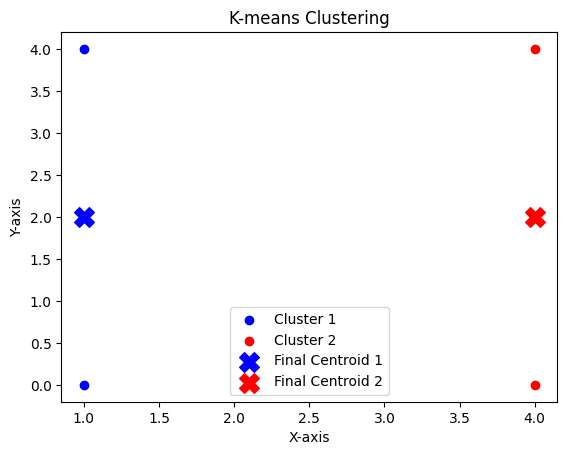

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0]
])

# Initialize centroids
centroid1 = np.array([1, 2])
centroid2 = np.array([4, 2])

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to perform K-means clustering
def k_means_clustering(data, centroid1, centroid2, max_iterations=100):
    for _ in range(max_iterations):
        # Step 1: Assign each point to the nearest centroid
        cluster1_points = []
        cluster2_points = []

        for point in data:
            distance_to_centroid1 = euclidean_distance(point, centroid1)
            distance_to_centroid2 = euclidean_distance(point, centroid2)

            if distance_to_centroid1 < distance_to_centroid2:
                cluster1_points.append(point)
            else:
                cluster2_points.append(point)

        # Step 2: Recalculate centroids
        new_centroid1 = np.mean(cluster1_points, axis=0)
        new_centroid2 = np.mean(cluster2_points, axis=0)

        # Check for convergence
        if np.array_equal(centroid1, new_centroid1) and np.array_equal(centroid2, new_centroid2):
            break

        centroid1, centroid2 = new_centroid1, new_centroid2

    return cluster1_points, cluster2_points, centroid1, centroid2

# Perform K-means clustering
cluster1_points, cluster2_points, final_centroid1, final_centroid2 = k_means_clustering(data, centroid1, centroid2)

# Plot the clusters
plt.scatter(*zip(*cluster1_points), color='blue', label='Cluster 1')
plt.scatter(*zip(*cluster2_points), color='red', label='Cluster 2')
plt.scatter(*final_centroid1, color='blue', marker='X', s=200, label='Final Centroid 1')
plt.scatter(*final_centroid2, color='red', marker='X', s=200, label='Final Centroid 2')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering')
plt.legend()
plt.show()
